In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rc
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

In [2]:
## This is the derivative of our function:
def dxdt(t):
    return np.cos(t)

In [3]:
def Euler(yi,t,dydt,h):
    """
    Compute the Euler's method approximation of unknown function F at position i ( F(i) )
    
    args:
        :yi (float) - the initial condition
        :t (float) - timestep of interest
        :dydt (function) - dF/dt
        :h (float) - stepsize
        
    returns:
        :(float) - the approximation
    """
    return yi + dydt(t) * h

def Heun(yi, t, dydt, h):
    """
    Compute the Runge-Kutta order 2 approximation of unknown function F at position i ( F(i) )
    Also known as Heun's method, [modified|improved] Euler's method
    
    args:
        :yi (float) - the initial condition
        :ti (float) - timestep of interest
        :dydt (function) - dF/dt
        :h (float) - stepsize
        
    returns:
        :(float) - RK2 approximation
    """
    
    return yi + (h/2) * (dydt(t) + dydt(t+h))

def approximate(y0, dydt, t, solver):
    """
    return an approximation of F = integral(dydt) using the solver 
    
    args:
        :y0 (float) - initial condition F(0)
        :dydt (function) - the derivative of F
        :t (list, np.array) - the timesteps to consider
        :solver (function) - the method used to approximate F
        
    returns:
        :(np.array) - approximation of F from t0 to tn
    """
    n = len(t) # number of timesteps to approximate into the future
    h = abs(t[0] - t[1]) # assuming linearly spaced timesteps
    
    Fhat = np.zeros(n) # the list of approximations of F s.t Fhat[i] ~= F(i)
    Fhat[0] = y0
    
    for i in range(1,n,1):
        Fhat[i] = solver(Fhat[i-1],t[i-1],dydt,h)
    
    return Fhat

def rk1(y0, dydt, t):
    return approximate(y0, dydt, t, Euler)

def rk2(y0, dydt, t):
    return approximate(y0, dydt, t, Heun)

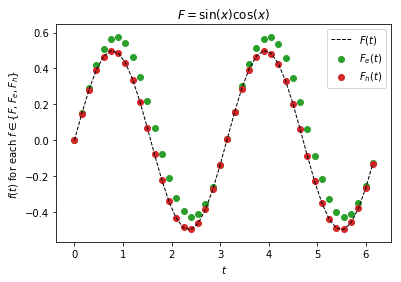

In [4]:
def F(x):
    # our 'unknown' function F
    return np.sin(x)*np.cos(x)

def dFdx(x):
    # derivative of unknown F with respect to x
    return np.power(np.cos(x),2) - np.power(-np.sin(x), 2)

n = np.pi * 2
h = 0.15
t = np.arange(0,n, h) # [0,2pi] in steps of H
y0 = 0

#plt.figure(figsize=(9,12))
#ts,xs = do_Euler(x0,h,n)
plt.plot(t, F(t), label='$F(t)$',linestyle="--",color="black",linewidth=1)
plt.scatter(t,rk1(y0=F(0),dydt=dFdx,t=t),label="$F_{e}(t)$",color="C2")
plt.scatter(t,rk2(y0=F(0),dydt=dFdx,t=t),label="$F_{h}(t)$",color="C3")
plt.title("$F = \sin(x)\cos(x)$")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$f(t)$ for each $f \in \{F, F_{e}, F_{h}\}$")
plt.show()

In [5]:
def do_Heun(x0,h,n):
    '''Heun's or improved Euler's method function'''
    ts = np.zeros(n)
    xs = np.zeros(n)
    xs[0] = x0
    ts[0] = 0
    for i in range(1,n-1,1):
        ts[i] = ts[i-1] + h
        xs[i] = Euler(xs[i-1],ts[i-1],dxdt,h)
    
    return ts,xs
    

In [6]:
euler = rk1(y0=F(0),dydt=dFdx,t=t)
heun  = rk2(y0=F(0),dydt=dFdx,t=t)
actual  = F(t)

print(f"h  : {h}")
print(f"h*h = {h*h}   ~= {round(np.mean(abs(actual-euler)),4):.04f} = local err (Euler)")
print(f"h^3 = {h*h*h} ~= {round(np.mean(abs(actual-heun)),4)} = local err (Heun)")

h  : 0.15
h*h = 0.0225   ~= 0.0748 = local err (Euler)
h^3 = 0.003375 ~= 0.0024 = local err (Heun)
